In [16]:
import pandas as pd

In [17]:
df= pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()
df.shape
df.describe()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
print(f'age : {df.age.count()}')
print(f'sex : {df.sex.count()}')
print(f'bmi : {df.bmi.count()}')
print(f'children : {df.children.count()}')
print(f'smoker : {df.smoker.count()}')
print(f'region : {df.region.count()}')
print(f'charges : {df.charges.count()}')

age : 1338
sex : 1338
bmi : 1338
children : 1338
smoker : 1338
region : 1338
charges : 1338


In [19]:
print(f'age : {df.age.nunique()}')
print(f'sex : {df.sex.nunique()}')
print(f'bmi : {df.bmi.nunique()}')
print(f'children : {df.children.nunique()}')
print(f'smoker : {df.smoker.nunique()}')
print(f'region : {df.region.nunique()}')
print(f'charges : {df.charges.nunique()}')

age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337


In [20]:
print(f'age : {df.age.dtype}')
print(f'sex : {df.sex.dtype}')
print(f'bmi : {df.bmi.dtype}')
print(f'children : {df.children.dtype}')
print(f'smoker : {df.smoker.dtype}')
print(f'region : {df.region.dtype}')
print(f'charges : {df.charges.dtype}')

age : int64
sex : object
bmi : float64
children : int64
smoker : object
region : object
charges : float64


In [21]:
print(f'age : {pd.api.types.is_numeric_dtype(df.age)}')
print(f'sex : {pd.api.types.is_numeric_dtype(df.sex)}')
print(f'bmi : {pd.api.types.is_numeric_dtype(df.bmi)}')
print(f'children {pd.api.types.is_numeric_dtype(df.children)}')
print(f'smoker : {pd.api.types.is_numeric_dtype(df.smoker)}')
print(f'region : {pd.api.types.is_numeric_dtype(df.region)}')
print(f'charges : {pd.api.types.is_numeric_dtype(df.charges)}')

age : True
sex : False
bmi : True
children True
smoker : False
region : False
charges : True


In [22]:
print(f'age : {df.age.isnull().sum()}')
print(f'sex : {df.sex.isnull().sum()}')
print(f'bmi : {df.bmi.isnull().sum()}')
print(f'children : {df.children.isnull().sum()}')
print(f'smoker : {df.smoker.isnull().sum()}')
print(f'region : {df.region.isnull().sum()}')
print(f'charges : {df.charges.isnull().sum()}')

age : 0
sex : 0
bmi : 0
children : 0
smoker : 0
region : 0
charges : 0


In [23]:
import numpy as np
print(df.charges.min())
print(df.charges.max())
print(df.charges.mean())
print(df.charges.mode().values[0])
print(df.charges.quantile(.25))
print(df.charges.quantile(.50))
print(df.charges.median())

1121.8739
63770.42801
13270.422265141257
1639.5631
4740.28715
9382.033
9382.033


In [24]:
df.charges.std()
np.std(df.charges, ddof=1)

12110.011236693994

In [25]:
from scipy.stats import kurtosis, skew
print(skew(df.charges, bias=False))
print(kurtosis(df.charges, bias=False))
print(df.charges.skew())
print(df.charges.kurt())

1.5158796580240383
1.6062986532967916
1.5158796580240388
1.6062986532967907


In [26]:
# Correlation and P-score when you see a correlation 
# of 0.8 with a p-value of 0.01, it means there's a strong
# positive relationship between the variables (when one goes up, the other tends to go up too),
# and it's very unlikely that this relationship is due to chance.
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [27]:
df.charges.corr(df.bmi)

0.1983409688336288

In [28]:
from scipy import stats
r,p= stats.pearsonr(df.charges,df.age)
print(r,p)

0.29900819333064765 4.8866933317203816e-29


In [29]:
corr_df= pd.DataFrame(columns=['r','p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r,p=stats.pearsonr(df.charges, df[col])
        corr_df.loc[col]=[round(r,3), round(p,3)]
corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


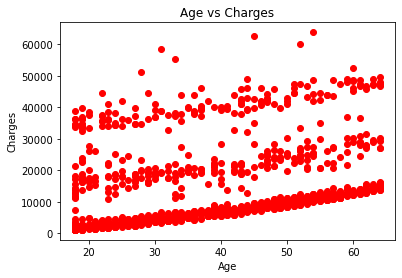

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.charges, color='Red')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()

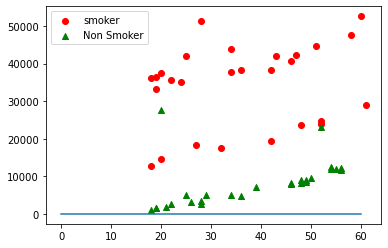

In [66]:
from scipy import stats

df_smoker=df[df['smoker']=='yes'].sample(27)
df_nsmoker=df[df['smoker']=='no'].sample(27)


m,b,r,p, err=stats.linregress( df_smoker.age,df_nsmoker.age)
x=range(0,df_smoker.age.max())
y= m*x + b

plt.plot(x,y)
plt.scatter(df_smoker.age,df_smoker.charges,color='Red',marker='o',label='smoker')
plt.scatter(df_nsmoker.age, df_nsmoker.charges, color='Green', marker='^',label='Non Smoker')
plt.legend()
plt.show()

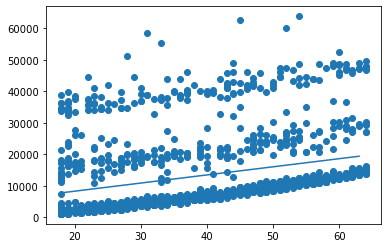

In [72]:
from scipy import stats




m,b,r,p, err=stats.linregress( df.age,df.charges)
x=range(df.age.min(),df.age.max())
y= m*x + b

plt.plot(x,y)
plt.scatter(df.age,df.charges)

plt.show()

In [76]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model=ols(formula='charges~age', data=df).fit()
white_test=het_white(model.resid, model.model.exog)
breuschpagan_test=het_breuschpagan(model.resid, model.model.exog)

output_df= pd.DataFrame(columns=['Lm stats', 'LM p','F stat','F stat p'])
output_df.loc['White']=white_test
output_df.loc['Breuch-Pagan']=breuschpagan_test

output_df

,Lm stats,LM p,F stat,F stat p
White,0.002713,0.998645,0.001353,0.998648
Breuch-Pagan,0.000413,0.983776,0.000413,0.983792


In [81]:

import plotly.express as px

fig=px.scatter_3d(df,x='age',y='charges', z='bmi', color='smoker')
fig.show()